In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [127]:


df = image_dataset_from_directory(
    "my_dataset/",
    image_size = (28, 28),
    color_mode = "grayscale",
    label_mode = "int",
    shuffle = True
)

Found 160 files belonging to 8 classes.


In [128]:

X_all = []
y_all = []

for images, labels in df:
    X_all.append(images.numpy())
    y_all.append(labels.numpy())

X = np.concatenate(X_all)
y = np.concatenate(y_all)


In [129]:
X_train, y_train, X_test, y_test = X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train = X_train / 255.0 
X_test = X_test / 255.0 

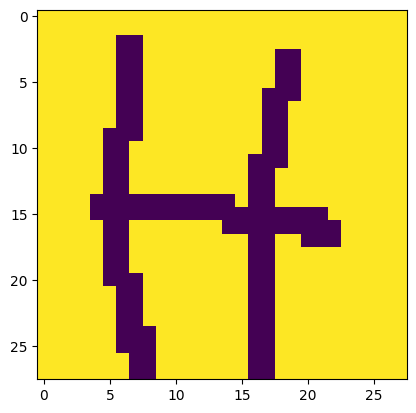

In [134]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])

In [135]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(8, activation = "sigmoid"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [136]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1146 - loss: 2.0835 - val_accuracy: 0.1250 - val_loss: 2.0722
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1229 - loss: 2.0679 - val_accuracy: 0.1250 - val_loss: 2.0591
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1594 - loss: 2.0566 - val_accuracy: 0.2500 - val_loss: 2.0431
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2000 - loss: 2.0460 - val_accuracy: 0.3125 - val_loss: 2.0251
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2385 - loss: 2.0137 - val_accuracy: 0.4062 - val_loss: 2.0105
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3448 - loss: 1.9974 - val_accuracy: 0.3750 - val_loss: 1.9874
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3292 - loss: 1.9712 - val_accuracy: 0.3750 - val_loss: 1.9596
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3635 - loss: 1.9489 - val_accuracy: 0.4062 - val_loss: 1.9334


In [137]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9375 - loss: 0.1896


[0.18955472111701965, 0.9375]

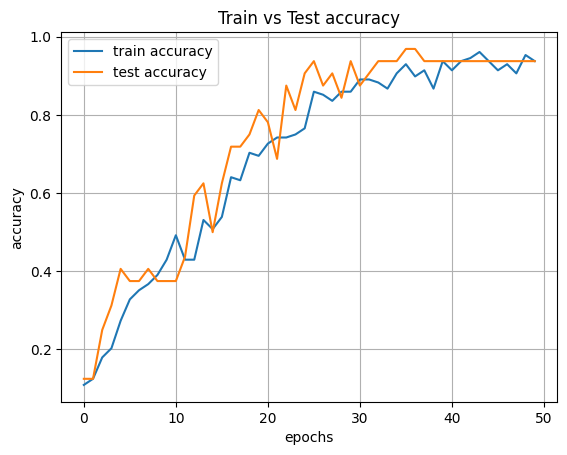

In [138]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "test accuracy")
plt.title("Train vs Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


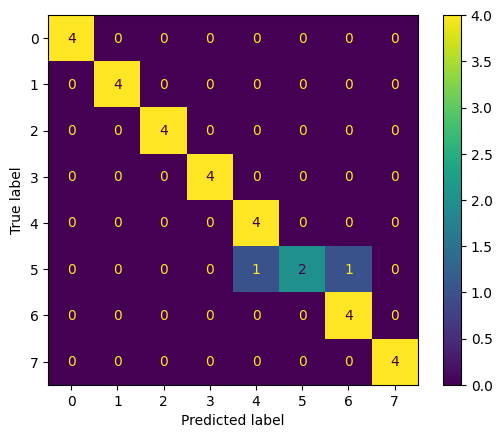

In [139]:
y_pred_probs = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred_probs, axis=1)

if len(y_test.shape) > 1:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()